# Bycicle Renting Data Exploration
## by Sunny

## Investigation Overview

> The dataset includes information about individual rides made in a bik-sharing system covering the greater San Francisco Bay are. The main goal of the investigation is to answer the question:

1. How long the average trip takes in different user groups in terms of time of day, day of the week, month of the year, season of the year? 
2. When are the most trips take place in terms of time of day?day of the week, month of the year, season of the year?



## Dataset Overview

> The original data is downloaded from https://www.fordgobike.com/system-data by month, I conbined the monthly data in 2019 to form a whole dataset outside this notebook. The combined 2019 dataset includes 2506983 entries with 15 features ['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'rental_access_method', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'].

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('combined_csv.csv')
df1 = df[['bike_id','duration_sec','start_time','end_time','user_type','rental_access_method' ]]
df1['start_time'] = pd.to_datetime(df1['start_time'] )
df1['end_time'] = pd.to_datetime(df1['end_time'] )
# duration in minite unit
df1['duration_min'] = round(df1['duration_sec']/60)
# create a weekday flag column
df1['weekday'] = df1.start_time.dt.weekday
df1 = df1.set_index(pd.DatetimeIndex(df1['start_time']))

## Average Trip Duration Analysis

> The average trip duration based on hours, weekdays, months, seasons are shown in the following.

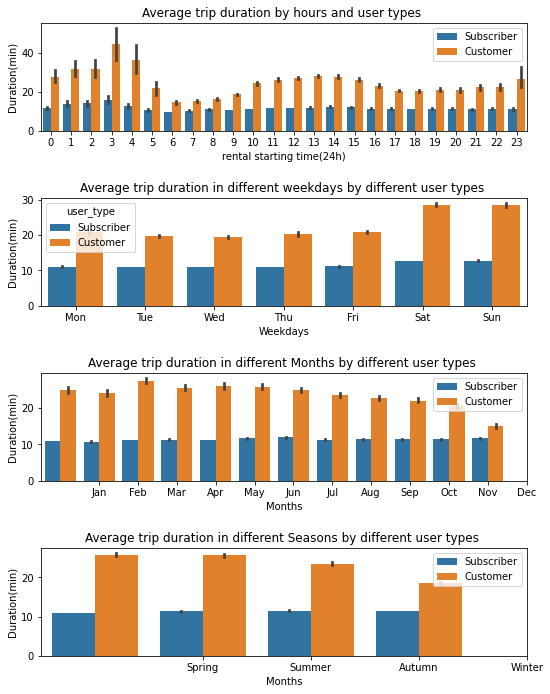

In [7]:
plt.figure(figsize = [8, 10])



ax = plt.subplot(4, 1, 1)
sb.barplot(x=df1.index.hour, y="duration_min", hue = 'user_type',data=df1)
plt.title('Average trip duration by hours and user types ')
plt.legend(loc = 'upper right')
plt.xlabel('rental starting time(24h)')
plt.ylabel('Duration(min)')

ax = plt.subplot(4, 1, 2)
sb.barplot(x="weekday", y="duration_min", hue = 'user_type',data=df1)
plt.title('Average trip duration in different weekdays by different user types ')
plt.xlabel('Weekdays')
plt.ylabel('Duration(min)')
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu', 'Fri','Sat', 'Sun'])

ax = plt.subplot(4, 1, 3)
sb.barplot(x=df1.index.month, y="duration_min", hue = 'user_type',data=df1)
plt.legend(loc = 'upper right')
plt.title('Average trip duration in different Months by different user types ')
plt.xlabel('Months')
plt.ylabel('Duration(min)')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax = plt.subplot(4, 1, 4)
sb.barplot(x=df1.index.quarter, y="duration_min", hue = 'user_type',data=df1)
plt.legend(loc = 'upper right')
plt.title('Average trip duration in different Seasons by different user types ')
plt.xlabel('Months')
plt.ylabel('Duration(min)')
plt.xticks([1,2,3,4], ['Spring', 'Summer', 'Autumn', 'Winter']);

plt.tight_layout(pad = 2.0)


## Trip Counts Analysis

> When are the most trips take place in terms of time of day?day of the week, month of the year, season of the year?

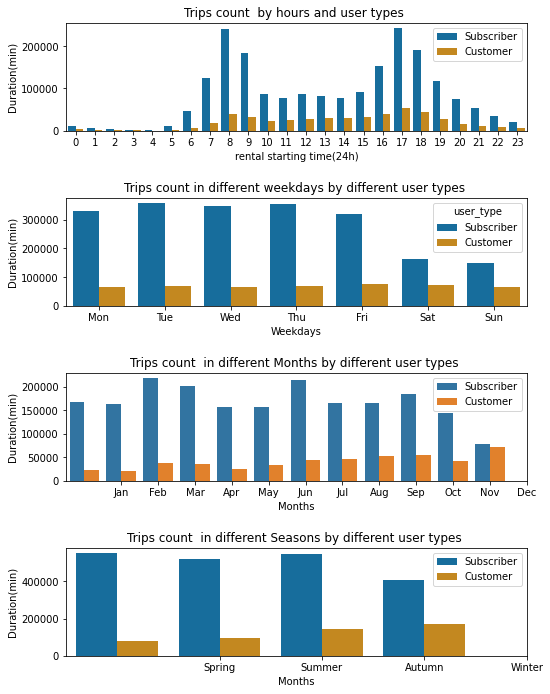

In [8]:
plt.figure(figsize = [8, 10])

plt.subplot(4, 1, 1)
sb.countplot(data = df1, x = df1["start_time"].dt.hour, hue ='user_type' , palette = "colorblind")
plt.title('Trips count  by hours and user types ')
plt.legend(loc = 'upper right')
plt.xlabel('rental starting time(24h)')
plt.ylabel('Duration(min)')

plt.subplot(4, 1, 2)
sb.countplot(data = df1, x = df1["start_time"].dt.weekday, hue ='user_type' , palette = "colorblind")
plt.title('Trips count in different weekdays by different user types ')
plt.xlabel('Weekdays')
plt.ylabel('Duration(min)')
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu', 'Fri','Sat', 'Sun'])

plt.subplot(4, 1, 3)
sb.countplot(data = df1, x = df1["start_time"].dt.month, hue ='user_type')
plt.legend(loc = 'upper right')
plt.title('Trips count  in different Months by different user types ')
plt.xlabel('Months')
plt.ylabel('Duration(min)')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.subplot(4, 1, 4)
sb.countplot(data = df1, x = df1["start_time"].dt.quarter, hue ='user_type' , palette = "colorblind")
plt.legend(loc = 'upper right')
plt.title('Trips count  in different Seasons by different user types ')
plt.xlabel('Months')
plt.ylabel('Duration(min)')
plt.xticks([1,2,3,4], ['Spring', 'Summer', 'Autumn', 'Winter']);

plt.tight_layout(pad = 2.0)

## Key Insights

In the light of the above findings, we can see the diifferent usage pattern of the user segments. The company can use such analysis results to better tailor their operation stretagy. 
* The subscribers tend to use the bicycle for commuting, who have more trips during workdays and similar trip duration. 
* The customers tend to use bicycle for leisure use, who have longer trip duration and higher usage during weekends. 
#### Improvement advice: I also find the rental access data is incomplete with 2386145 empty entries, which could be very helpful to get the full picture of the customer channels and further develop the more targeted sale campaign. Based on what we have in the exsiting data, we know that customers tend to use app rather than clipper card. 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!